# Program used for the relationship between cellular phenotypes before BL illumination and following cellular fates.

This program are used in Figure S7 and S11.

### import packages

In [1]:
import numpy as np
import scipy.stats as stat
import pandas as pd 
import matplotlib.pyplot as plt
import os
from common_function import singlecell as sc

### Matplotlib setting

In [2]:
plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams["font.size"] = 16.0

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

## Figure S7
mCherry-CAT fluorescence intensities and elongation rate before BL illumination did not correlated with cellular fates.

### set variables

In [3]:
path_list = ['./single-cell_data/deletion_in_Cp/180726']
branch_path = path_list[0]
BL_time_Cp_time_list = pd.read_csv('./BL_time_Cp_time_data.csv')
BL_time = BL_time_Cp_time_list.loc[BL_time_Cp_time_list['Date'] == int(branch_path[-6:]), 'BL_time'].reset_index(drop = True)[0] ## slice number just after blue light exposure
Cp_time = BL_time_Cp_time_list.loc[BL_time_Cp_time_list['Date'] == int(branch_path[-6:]), 'Cp_time'].reset_index(drop = True)[0] ## slice number just after Cp exposure
if BL_time == 0:
    BL_time = Cp_time
window = 1/2 ## 1-h averaged time window (1/12 is non-averaged window)

ymin_list = [0,-0.2]
ymax_list = [420,1.9]

height_list = [[335,385],[1.3,1.65]]
center_list = [[350,400],[1.4,1.75]]
width_list = [15,0.1]
yticks_list = [[0,100,200,300,400],[0,0.5,1.0,1.5]]
yticklabels_list = [[0,'',200,'',400],[0,'',1.0,'']]

index_list = ['mCherry-CAT','elongation_rate']
color_list = ['royalblue', 'limegreen', 'tomato', 'grey']
label_list = ['deleted dividing', 'deleted non-dividing', 'non-deleted', 'pre-deleted']
ylabel_list = ['mCherry-CAT fluorescence intensity \n before BL exposure (a.u.)','Elongation rate \n before BL exposure (h$^{-1}$)']
print_list = ['mCherry-CAT fluorescence intensities', 'elongation rates']

### import single-cell results and extract 1-h averaged phenotypes before BL illumination

In [4]:
image_path = branch_path
Number = os.listdir(image_path + '/integrated')
Number = [i for i in Number if 'Results' in i]
for i in range(len(Number)):
    Number[i] = Number[i].lstrip('Results')
    Number[i] = Number[i].rstrip('.csv')

Result_all = sc.Read_results_data(Number, dr = image_path)
##Calculate normalised term
##norm = sc.Calculate_normalize_term(Result_all, BL_time = BL_time, dr = image_path)             

id_list = sorted(Result_all['id_number'].drop_duplicates().tolist())
Data_list = []
for id_number in id_list:
    ## Combine result data (2-color or 3-color)
    if all([x in Result_all.columns.tolist() for x in ['TxRed', 'YFP']]):
        Result = sc.All_Result_time_elongation_fluorescence_ratio(Result_all, id_number, directory = image_path, BL_time1 = BL_time, normalized_ratio = norm, win = window)
    else:
        Result = sc.All_Result_time_elongation_rate(Result_all, id_number, directory = image_path, BL_time1 = BL_time, win = window)
    Data_list += [Result[np.isclose(Result['Time'],-7/6)]]

### plot and save figures.

This program also calculate and print the p-value of each pair.

In mCherry-CAT fluorescence intensities, 
p-value for growth-restored cell lineages vs growth-halted cell lineages is 0.298. 
p-value for resistance-gene-deleted cell lineages vs non-deleted cell lineages is 0.852.

In elongation rates, 
p-value for growth-restored cell lineages vs growth-halted cell lineages is 0.121. 
p-value for resistance-gene-deleted cell lineages vs non-deleted cell lineages is 0.346.



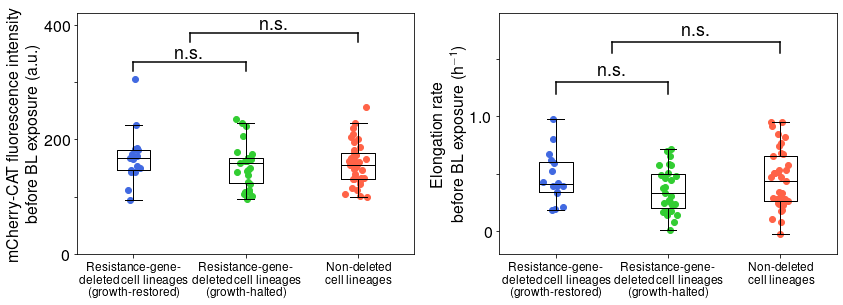

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4.5))
for k, label in enumerate(index_list):
    for i in np.arange(0,3,1):
        y = Data_list[i][label]
        x = np.random.normal(i+1, 0.04, size = len(Data_list[i]))
        axes[k].plot(x, y, 'o', color = color_list[i])
    axes[k].boxplot([Data_list[0][label],Data_list[1][label],Data_list[2][label]], medianprops=dict(color='black', linewidth=1), sym="")
    
    stats1, pvalue1 = stat.ttest_ind(Data_list[0][label],Data_list[1][label],equal_var = False)
    if pvalue1 > 0.01:
        axes[k].text(1.5,center_list[k][0],'n.s.',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    elif pvalue1 > 0.001:
        axes[k].text(1.5,center_list[k][0],r'$\ast$',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    axes[k].plot((1.0,2.0),(height_list[k][0],height_list[k][0]), color = 'black')
    axes[k].plot((1.0,1.0),(height_list[k][0],height_list[k][0]-width_list[k]), color = 'black')
    axes[k].plot((2.0,2.0),(height_list[k][0],height_list[k][0]-width_list[k]), color = 'black')
        
    stats2, pvalue2 = stat.ttest_ind(pd.concat([Data_list[0],Data_list[1]])[label],Data_list[2][label],equal_var = False)
    if pvalue2 > 0.01:
        axes[k].text(2.25,center_list[k][1],'n.s.',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    elif pvalue2 > 0.001:
        axes[k].text(2.25,center_list[k][1],r'$\ast$',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    axes[k].plot((1.5,3.0),(height_list[k][1],height_list[k][1]), color = 'black')
    axes[k].plot((1.5,1.5),(height_list[k][1],height_list[k][1]-width_list[k]), color = 'black')
    axes[k].plot((3.0,3.0),(height_list[k][1],height_list[k][1]-width_list[k]), color = 'black')
                      
    axes[k].set_ylabel(ylabel_list[k],fontsize = 16)
    axes[k].set_xticks([1,2,3])
    axes[k].set_xticklabels(['Resistance-gene-\ndeleted cell lineages\n(growth-restored)', 'Resistance-gene-\ndeleted cell lineages\n(growth-halted)', 'Non-deleted\ncell lineages'],fontsize= 12)
    axes[k].set_ylim(ymin_list[k],ymax_list[k])
    axes[k].set_yticks(yticks_list[k])
    axes[k].set_yticklabels(yticklabels_list[k])
    title = print_list[k]
    print('In {}, \np-value for growth-restored cell lineages vs growth-halted cell lineages is {:.3f}. \n'.format(title,pvalue1)\
          + 'p-value for resistance-gene-deleted cell lineages vs non-deleted cell lineages is {:.3f}.\n'.format(pvalue2))
plt.tight_layout()
plt.show()
#save_path = './FigureS7.pdf'
#plt.savefig(save_path, transparent = True, bbox_inches = 'tight')
#plt.cla()

## Figure S11
Relationship between elongation rates, RplS-mCherry and RpsB-mVenus fluorescence intensities and fluorescence ratio (RplS-mCherry/RpsB-mVenus) before BL illumination and cellular fates.

### set variables

In [6]:
path_list = ['./single-cell_data/ribosome_reporter/YK0136/191214']
branch_path = path_list[0]
BL_time_Cp_time_list = pd.read_csv('./BL_time_Cp_time_data.csv')
BL_time = BL_time_Cp_time_list.loc[BL_time_Cp_time_list['Date'] == int(branch_path[-6:]), 'BL_time'].reset_index(drop = True)[0] ## slice number just after blue light exposure
Cp_time = BL_time_Cp_time_list.loc[BL_time_Cp_time_list['Date'] == int(branch_path[-6:]), 'Cp_time'].reset_index(drop = True)[0] ## slice number just after Cp exposure
if BL_time == 0:
    BL_time = Cp_time
window = 1/2 ## 1-h averaged time window (1/12 is non-averaged window)

ymin_list = [-0.2,0,0,0.7]
ymax_list = [2.0,460,680,1.6]

center_list = [[1.6,1.9],[360,440],[550,640],[1.35,1.55]]
height_list = [[1.5,1.8],[340,420],[520,610],[1.3,1.5]]
width_list = [0.1, 20, 20, 0.05]
yticks_list = [[0,0.5,1.0,1.5,2.0],[0,100,200,300,400],[0,100,200,300,400,500,600],[0.8,1.0,1.2,1.4,1.6]]
yticklabels_list = [[0,'',1.0,'',2.0],[0,'',200,'',400],[0,'',200,'',400,'',600],[0.8,1.0,1.2,1.4,1.6]]

index_list = ['elongation_rate', 'RplS-mCherry', 'RpsB-YFP', 'fluorescence_ratio']
color_list = ['royalblue', 'limegreen', 'tomato', 'grey']
label_list = ['deleted dividing', 'deleted non-dividing', 'non-deleted', 'pre-deleted']
ylabel_list = ['Elongation rate \n before BL exposure (h$^{-1}$)','RplS-mCherry fluorescence intensity\nbefore BL exposure (a.u.)',\
               'RpsB-mVenus fluorescence intensity\n before BL exposure (a.u.)','Fluorescence ratio \n before BL exposure (a.u.)']
print_list = ['Elongation rates', 'RplS-mCherry fluorescence intensities', 'RpsB-mVenus fluorescence intensities','fluorescence ratio']

### import single-cell results and extract 1-h averaged phenotypes before BL illumination

In [7]:
image_path = branch_path
Number = os.listdir(image_path + '/integrated')
Number = [i for i in Number if 'Results' in i]
for i in range(len(Number)):
    Number[i] = Number[i].lstrip('Results')
    Number[i] = Number[i].rstrip('.csv')

Result_all = sc.Read_results_data(Number, dr = image_path)
norm = sc.Calculate_normalize_term(Result_all, BL_time = BL_time, dr = image_path) ###Calculate for normalization of fluorescence ratuo before BL illumination.

id_list = sorted(Result_all['id_number'].drop_duplicates().tolist())
Data_list = []
for id_number in id_list:
    ## Combine result data (2-color or 3-color)
    if all([x in Result_all.columns.tolist() for x in ['TxRed', 'YFP']]):
        Result = sc.All_Result_time_elongation_fluorescence_ratio(Result_all, id_number, directory = image_path, BL_time1 = BL_time, normalized_ratio = norm, win = window)
    else:
        Result = sc.All_Result_time_elongation_rate(Result_all, id_number, directory = image_path, BL_time1 = BL_time, win = window)
    Data_list += [Result[np.isclose(Result['Time'],-7/6)]]

### plot and save figures.

This program also calculate and print the p-value of each pair.  
Astarisk repersents the significant difference judged at the significant level of 0.01.

In Elongation rates, 
p-value for growth-restored cell lineages vs growth-halted cell lineages is 0.103. 
p-value for resistance-gene-deleted cell lineages vs non-deleted cell lineages is 0.541.

In RplS-mCherry fluorescence intensities, 
p-value for growth-restored cell lineages vs growth-halted cell lineages is 0.870. 
p-value for resistance-gene-deleted cell lineages vs non-deleted cell lineages is 0.038.

In RpsB-mVenus fluorescence intensities, 
p-value for growth-restored cell lineages vs growth-halted cell lineages is 0.609. 
p-value for resistance-gene-deleted cell lineages vs non-deleted cell lineages is 0.010.

In fluorescence ratio, 
p-value for growth-restored cell lineages vs growth-halted cell lineages is 0.098. 
p-value for resistance-gene-deleted cell lineages vs non-deleted cell lineages is 0.147.



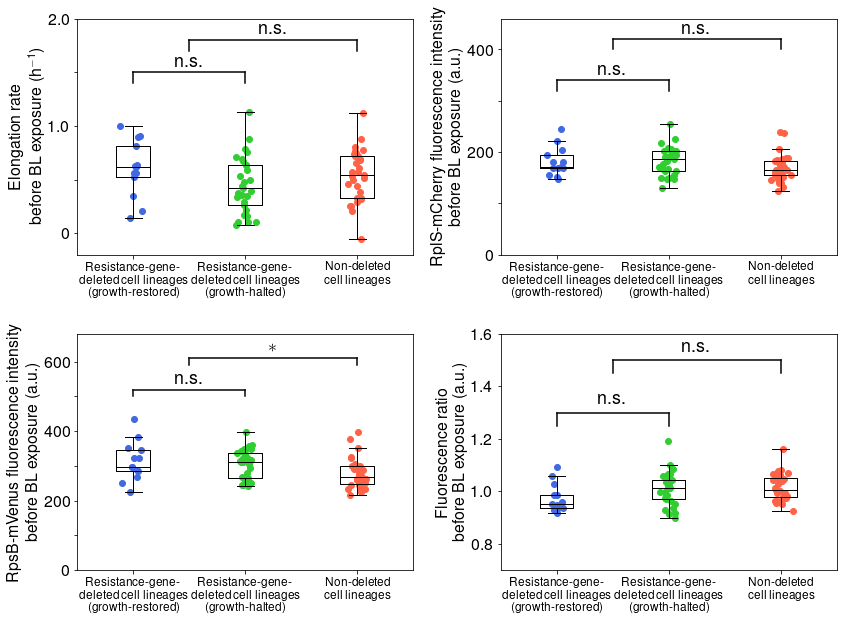

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,9))
for k, label in enumerate(index_list):
    k1, k2 = divmod(k,2)
    for i in np.arange(0,3,1):
        y = Data_list[i][label]
        x = np.random.normal(i+1, 0.04, size = len(Data_list[i]))
        axes[k1][k2].plot(x, y, 'o', color = color_list[i])
    axes[k1][k2].boxplot([Data_list[0][label],Data_list[1][label],Data_list[2][label]], medianprops=dict(color='black', linewidth=1), sym="")
    
    stats1, pvalue1 = stat.ttest_ind(Data_list[0][label],Data_list[1][label],equal_var = False)
    if pvalue1 > 0.01:
        axes[k1][k2].text(1.5,center_list[k][0],'n.s.',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    elif pvalue1 > 0.001:
        axes[k1][k2].text(1.5,center_list[k][0],r'$\ast$',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    axes[k1][k2].plot((1.0,2.0),(height_list[k][0],height_list[k][0]), color = 'black')
    axes[k1][k2].plot((1.0,1.0),(height_list[k][0],height_list[k][0]-width_list[k]), color = 'black')
    axes[k1][k2].plot((2.0,2.0),(height_list[k][0],height_list[k][0]-width_list[k]), color = 'black')
    
    stats2, pvalue2 = stat.ttest_ind(pd.concat([Data_list[0],Data_list[1]])[label],Data_list[2][label],equal_var = False)
    if pvalue2 > 0.01:
        axes[k1][k2].text(2.25,center_list[k][1],'n.s.',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    elif pvalue1 > 0.001:
        axes[k1][k2].text(2.25,center_list[k][1],r'$\ast$',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    axes[k1][k2].plot((1.5,3.0),(height_list[k][1],height_list[k][1]), color = 'black')
    axes[k1][k2].plot((1.5,1.5),(height_list[k][1],height_list[k][1]-width_list[k]), color = 'black')
    axes[k1][k2].plot((3.0,3.0),(height_list[k][1],height_list[k][1]-width_list[k]), color = 'black')
    
    axes[k1][k2].set_ylabel(ylabel_list[k],fontsize = 16)
    axes[k1][k2].set_xticks([1,2,3])
    axes[k1][k2].set_xticklabels(['Resistance-gene-\ndeleted cell lineages\n(growth-restored)', 'Resistance-gene-\ndeleted cell lineages\n(growth-halted)', 'Non-deleted\ncell lineages'],fontsize= 12)
    axes[k1][k2].set_ylim(ymin_list[k],ymax_list[k])
    axes[k1][k2].set_yticks(yticks_list[k])
    axes[k1][k2].set_yticklabels(yticklabels_list[k])
    title = print_list[k]
    print('In {}, \np-value for growth-restored cell lineages vs growth-halted cell lineages is {:.3f}. \n'.format(title,pvalue1)\
          + 'p-value for resistance-gene-deleted cell lineages vs non-deleted cell lineages is {:.3f}.\n'.format(pvalue2))
plt.tight_layout()
plt.show()
#save_path = './FigureS11.pdf'
#plt.savefig(save_path, transparent = True, bbox_inches = 'tight')
#plt.cla()